PERSONAL HEALTHCARE RECOMMNENDATION [SPECIFICALLY FOR DIABETES]- DATA SCIENCE PROJECT

UNID:UMID22052538152
NAME: JOLA KESEENA C

OBJECTIVE: TO PREDICT IF THE PATIENT IS AT RISK TO DIABETES OR NOT AND GIVE THEM LIFESTYLE SUGGESTIONS TO LEAD A HEALTHY LIFE

[ADDITIONALLY I DEPLOYED THIS IN STREAMLIT]
#[python -m streamlit run streamlit_app.py] run this for streamlit link

LOAD THE DATASETS AND INFORMATION ABOUT IT

NOTE:BECAUSE OF LACK OF DATA IN BLOOD.CSV I  MERGED IT WITH DIABETES.CSV

In [2]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv("blood.csv") 

# Load Pima dataset
pima = pd.read_csv('diabetes.csv')

In [3]:
# Optional: Preview
print(df.shape)
print(pima.shape)
print(pima.columns)

(748, 5)
(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
print("Dataset Info:")
print(df.info()) 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None


In [5]:
print("\n First 5 Rows:")
print(df.head())  


 First 5 Rows:
   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0


In [6]:
print("\n Column Names:")
print(df.columns.tolist()) 


 Column Names:
['Recency', 'Frequency', 'Monetary', 'Time', 'Class']


In [7]:
print("\nDataset Shape (rows, columns):")
print(df.shape)         



Dataset Shape (rows, columns):
(748, 5)


In [8]:
print("\n Summary Statistics:")
print(df.describe(include='all'))


 Summary Statistics:
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000


In [ ]:
MERGING

In [9]:
pima_trimmed = pima.iloc[:748].copy().reset_index(drop=True)
blood = df.reset_index(drop=True)


In [10]:
# Drop target from Pima so you can preserve 'Class' from blood
pima_features = pima_trimmed.drop(columns='Outcome')

# Merge features side by side
combined = pd.concat([df, pima_features], axis=1)

# Optional: Also keep the diabetes label
combined['Diabetes_Outcome'] = pima_trimmed['Outcome']

# View combined dataset
print(combined.head())
print(combined.shape)


   Recency  Frequency  Monetary  Time  Class  Pregnancies  Glucose  \
0        2         50     12500    99      1            6      148   
1        0         13      3250    28      1            1       85   
2        1         17      4000    36      1            8      183   
3        2         20      5000    45      1            1       89   
4        1         24      6000    77      0            0      137   

   BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  \
0             72             35        0  33.6                     0.627   50   
1             66             29        0  26.6                     0.351   31   
2             64              0        0  23.3                     0.672   32   
3             66             23       94  28.1                     0.167   21   
4             40             35      168  43.1                     2.288   33   

   Diabetes_Outcome  
0                 1  
1                 0  
2                 1  
3   

In [ ]:
IDENTIFYING AND FILLING MISSING VALUES

In [11]:
print("\n Missing Values:")
print(df.isnull().sum()) 


 Missing Values:
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [12]:
total_zeros = (df == 0).sum()
print(total_zeros)

Recency        5
Frequency      0
Monetary       0
Time           0
Class        570
dtype: int64


In [13]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")


Recency: int64
Frequency: int64
Monetary: int64
Time: int64
Class: int64


In [14]:

# Replace 0 with NaN in all columns except 'Class'
df.loc[:, df.columns != 'Class'] = df.loc[:, df.columns != 'Class'].replace(0, np.nan)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5792\377201953.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2. nan  1.  2.  1.  4.  2.  1.  2.  5.  4. nan  2.  1.  2.  2.  2.  2.
  2.  2.  2.  4.  2.  2.  9.  4.  4.  4.  4.  4.  1.  4.  4.  4.  2.  2.
  2.  4.  2.  4.  2.  2.  2.  2.  4.  4.  2.  2.  2.  2.  2.  2.  2.  2.
  4.  4.  4.  2.  2.  3.  2.  2.  2.  4.  2.  3.  2. nan  4.  1.  2.  2.
  4.  2.  2.  2.  2.  2.  2.  2.  4.  2.  2.  2.  2.  2.  4.  4.  4.  2.
  4.  4.  4.  4. 12.  4.  3.  4.  4.  5.  4.  2.  4.  2.  2.  6. nan  3.
  2.  2.  4.  4.  4.  4.  2. 11.  2.  4.  1.  2.  2.  4.  2.  2.  2.  2.
  4.  2.  4.  2.  4.  2.  2.  4.  2.  2.  2.  2.  9.  2.  2.  5.  4.  4.
  4.  4.  6.  2.  2.  2.  2.  4.  4.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 11. 11.  4.  4.  2.
  4. 10.  2.  4. 13. 11.  4.  4.  8.  4.  4.  4.  2. 11.  2.  2.  9.  4.
 11.  9.  4.  

In [15]:
df.shape


(748, 5)

In [16]:
# Fill missing values if any
combined.fillna(combined.median(numeric_only=True), inplace=True)

# Feature engineering (add useful ratios or interactions)
combined['Monetary_per_Frequency'] = combined['Monetary'] / (combined['Frequency'] + 1)
combined['Recency_Monetary_Interaction'] = combined['Recency'] * combined['Monetary']
combined['Is_Monetary_Zero'] = (combined['Monetary'] == 0).astype(int)



In [17]:
df.shape


(748, 5)

EXPLORATORY DATA ANALYSIS

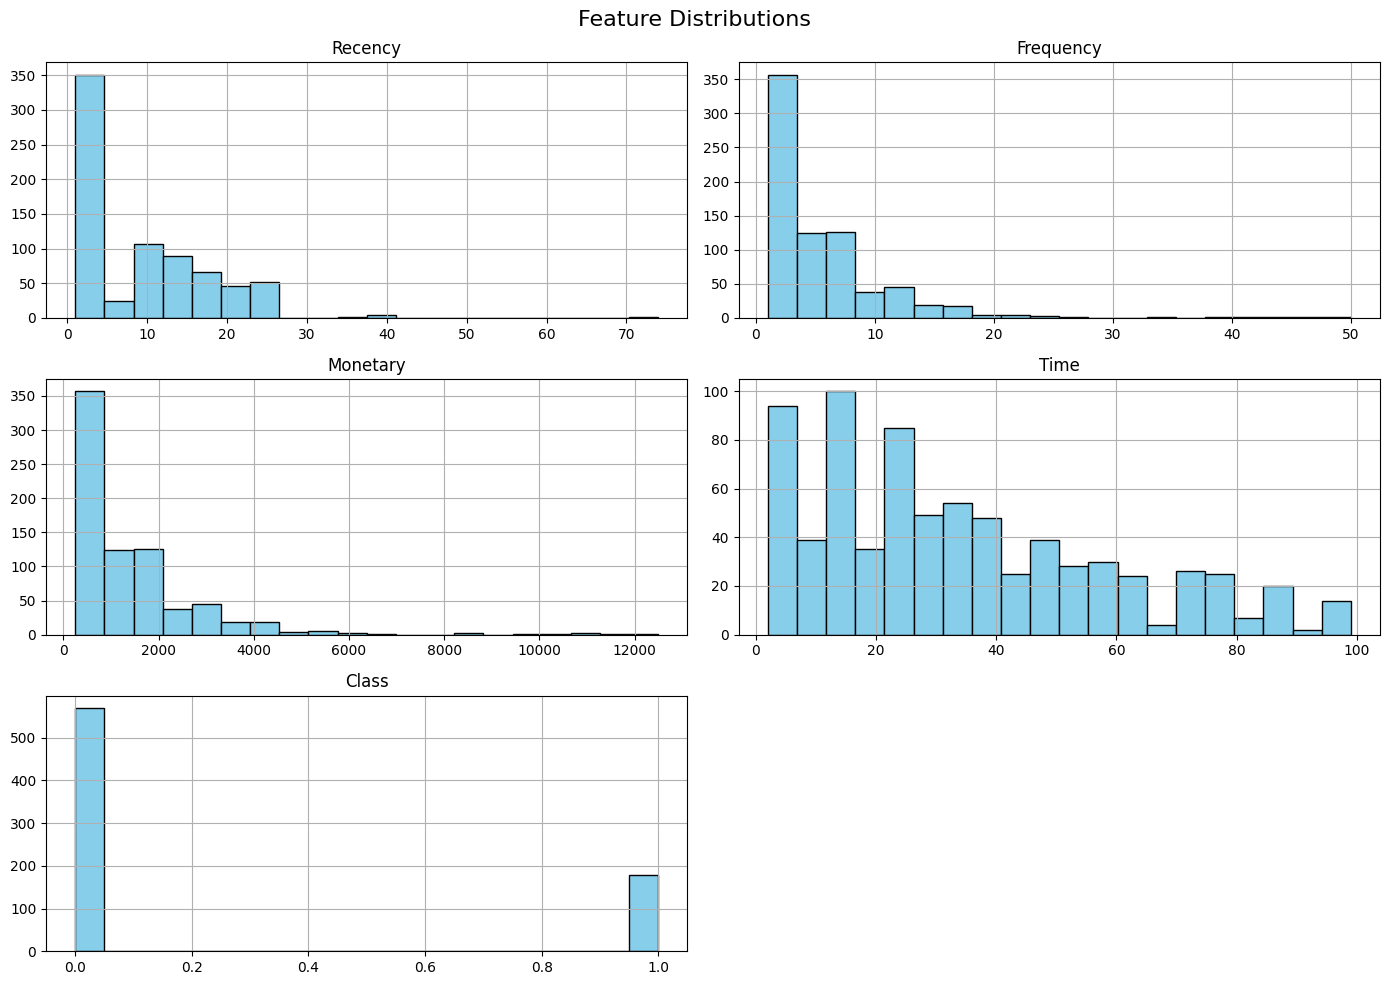

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

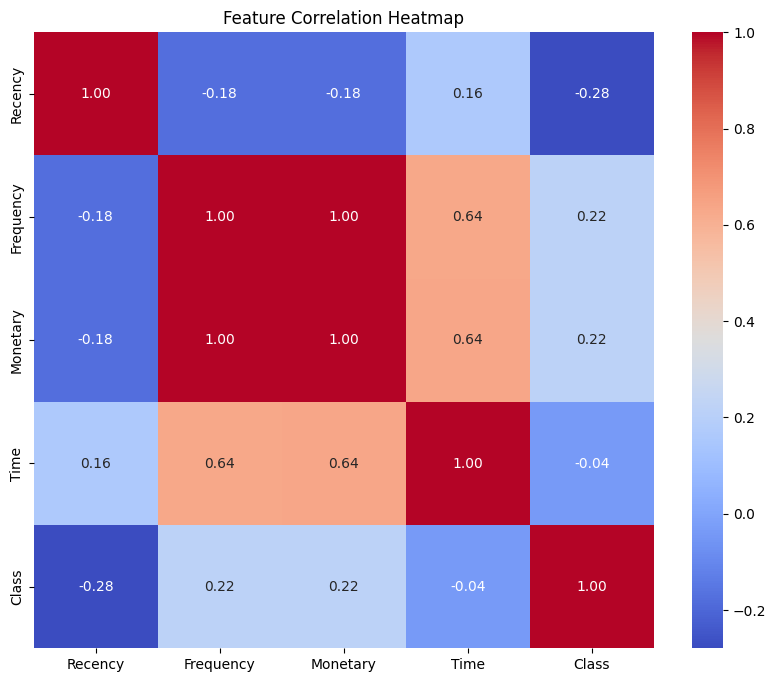

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [107]:
# Drop both 'Class' and 'Diabetes_Outcome' from features

selected_features = [
    'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction',
    'Pregnancies', 'Insulin', 'SkinThickness', 'Time'
]

X = combined[selected_features]
y = combined['Diabetes_Outcome']





In [108]:
print(X.columns.tolist())


['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies', 'Insulin', 'SkinThickness', 'Time']


In [ ]:
MODEL TRAINING AND BUILDING

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
USING SMOTE FOR CLASS IMBALNCE

In [111]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1',  # Or use 'recall' to focus on catching diabetics
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on SMOTE-balanced training data
random_search.fit(X_train_sm, y_train_sm)


# Predict and evaluate
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\n Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
📊 Confusion Matrix:
 [[77 25]
 [13 35]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.58      0.73      0.65        48

    accuracy                           0.75       150
   macro avg       0.72      0.74      0.73       150
weighted avg       0.77      0.75      0.75       150

✅ Accuracy: 0.7466666666666667


In [116]:
import joblib

joblib.dump(best_rf, 'final_diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
FEATURE IMPORTANCE

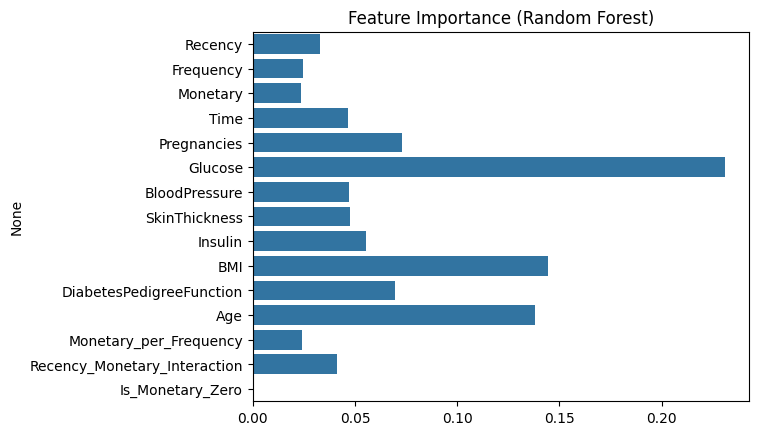

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = best_rf.feature_importances_
features = X.columns

sns.barplot(x=feat_imp, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


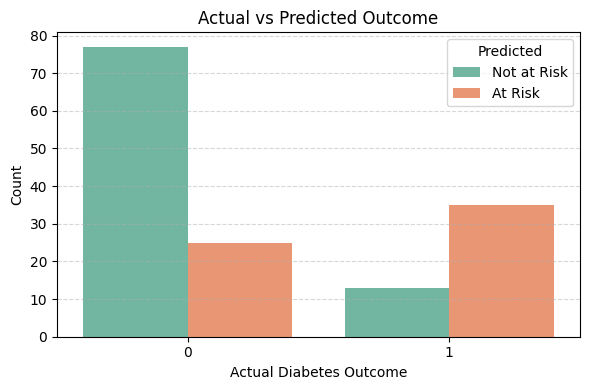

In [ ]:
#class 0  = green shows true negative correctly predicting not at risk"
#class 1 = orange shows true positive correctly predicting at risk"

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=y_test, hue=y_pred, palette="Set2")
    plt.xlabel("Actual Diabetes Outcome")
    plt.ylabel("Count")
    plt.title("Actual vs Predicted Outcome")
    plt.legend(title="Predicted", labels=["Not at Risk", "At Risk"])
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Usage
plot_actual_vs_predicted(y_test, y_pred_best_rf)
